# Let's use emcee to see if we can infer the velocity of a star using Adrian's code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
import emcee
import time
import corner

import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
from astropy.coordinates.builtin_frames.galactocentric import get_matrix_vectors

import aviary as av

%matplotlib inline

We want to infer the velocity and distance of a star from its proper motion in ra and dec, and 3-D position, marginalising over RV.

$$p(V_{xyz}, D|\mu_\alpha, \mu_\delta, \alpha, \delta, \pi) = p(\mu_\alpha, \mu_\delta, \alpha, \delta, \pi| V_{xyz}, D)~p(V_{xyz})~p(D)$$

Load the data.

In [2]:
df0 = pd.read_csv("../../data/gaia_mc5_velocities.csv")
m = np.isfinite(df0.vz.values)
df = df0.iloc[m]

Pick a star and set up variables.

In [4]:
i = 0
df1 = df.iloc[i]

pos = [df1.ra, df1.dec, df1.parallax]
pos_err = [df1.ra_error, df1.dec_error, df1.parallax_error]
pm = [df1.pmra, df1.pmdec]
pm_err = [df1.pmra_error, df1.pmdec_error]

Infer the vx, vy, vz velocities from the position and proper motion measurements.

In [ ]:
ndim, nwalkers = 4, 24
inits = [df1.basic_vx, df1.basic_vy, df1.basic_vz, np.log(1./df1.parallax)]
p0 = np.random.randn(nwalkers, ndim) + inits

sampler = emcee.EnsembleSampler(nwalkers, ndim, av.lnprob, args=(pm, pm_err, pos, pos_err))

sampler.run_mcmc(p0, 500, progress=True);

 92%|█████████▏| 459/500 [01:09<00:05,  7.46it/s]

(1920, 4)
[-7.516811357896795, 223.57770337115474, 0.9444379590417658, -1.6782637782895946]
[ 138.02696625  254.7676076  -162.11960284    1.67104742]


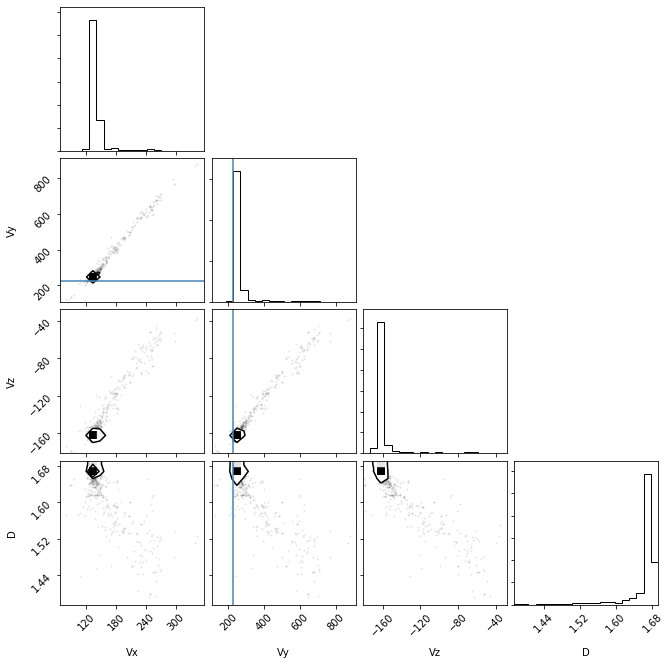

In [9]:
flat_samples = sampler.get_chain(discard=100, thin=5, flat=True)
params_inferred = np.median(flat_samples, axis=0)

labels = ["Vx", "Vy", "Vz", "D"]
fig = corner.corner(flat_samples, truths=inits, labels=labels);